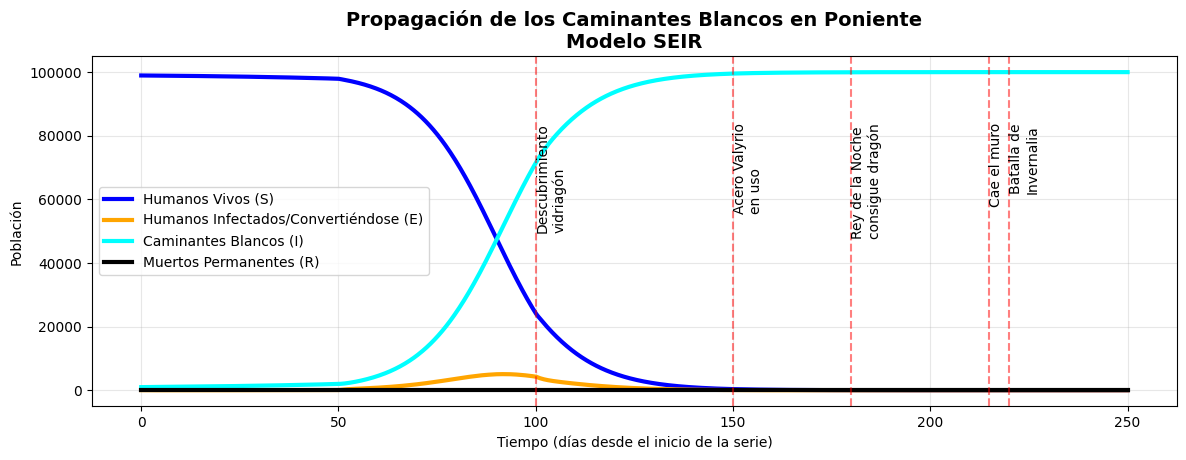

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation

class WhiteWalkersSEIR:
    def __init__(self):
        """
        Modelo SEIR para los Caminantes Blancos en Poniente
        Basado en la lore de Juego de Tronos
        """
        # Parámetros epidemiológicos adaptados a los Caminantes Blancos
        
        self.beta = 0.2      # Alta tasa de infección (convertir muertos en caminantes)
        self.sigma = 1/2     # Periodo de latencia muy corto (2 días para convertirse)
        self.gamma = 0.0     # Tasa de recuperación = 0 (no hay cura)
        
        # Población de Poniente (aproximadamente)
        self.N = 100000    # ~40 millones de habitantes
        
        # Factores especiales de los Caminantes Blancos
        self.alpha = 0.8     # Tasa de conversión de muertos a caminantes
        self.dragon_glass_effect = 0.0  # Efecto inicial del vidriagón
        self.valyrian_steel_effect = 0.0  # Efecto inicial del acero valyrio
        self.wall = 1
        self.winter = 0
        
        
        # Estados iniciales basados en la serie/libros
        self.initial_state = self.get_initial_conditions()
        
    def get_initial_conditions(self):
        """
        Define las condiciones iniciales basadas en la cronología de la serie
        """
        # Al inicio de la serie (Temporada 1)
        S0 = self.N - 1000 - 50 - 0    # Susceptibles
        E0 = 50                        # Expuestos (humanos tocados por la magia/convertiéndose)
        I0 = 1000                      # Caminantes Blancos activos
        R0 = 0                         # "Recuperados" (en este caso, muertos permanentes)
        
        return [S0, E0, I0, R0]
    
    def derivatives(self, t, y):
        """
        Ecuaciones diferenciales modificadas para Caminantes Blancos
        """
        S, E, I, R = y
        
        # Efectos especiales que varían con el tiempo
        dragon_glass_modifier = self.calculate_dragon_glass_effect(t)
        valyrian_steel_modifier = self.calculate_valyrian_steel_effect(t)
        wall = self.calculate_wall(t)
        winter_modifier = self.calculate_winter_effect(t)
        night_king_power = self.calculate_night_king_power(t)
        
        # Tasa de infección efectiva
        effective_beta = self.beta * winter_modifier * night_king_power *  (1 - dragon_glass_modifier - valyrian_steel_modifier) 
        
        # Ecuaciones del modelo SEIR modificado
        dSdt = -effective_beta * S * I / self.N  # Humanos siendo infectados/convertidos
        
        # Los expuestos son humanos que han sido tocados por la magia de los Caminantes
        dEdt = effective_beta * S * I / self.N - self.sigma * E
        
        dIdt = self.sigma * E - self.gamma * I
        
        # "Recuperados" en este contexto son muertos que NO se convierten en caminantes
        dRdt = self.gamma * I
        
        return [dSdt, dEdt, dIdt, dRdt]
   
    def calculate_dragon_glass_effect(self, t):
        """
        Efecto del vidriagón en reducir la propagación
        Basado en eventos cronológicos de la serie
        """
        if t < 100:  # Antes de que se descubra el vidriagón
            return 0.0
        elif t < 200:  # Descubrimiento en Rocadragón
            return 0.2
        else:  # Producción masiva
            return 0.4
    
    def calculate_valyrian_steel_effect(self, t):
        """
        Efecto del acero valyrio
        """
        if t < 150:  # Pocas espadas disponibles
            return 0.05
        else:  # Más espadas en uso
            return 0.15
    
    def calculate_winter_effect(self, t):
        """
        El invierno fortalece a los Caminantes Blancos
        """
        # El invierno se intensifica con el tiempo
        winter_intensity = min(1.0, 0.5 + 0.01 * t)
        return winter_intensity
    
    def calculate_night_king_power(self, t):
        """
        El Rey de la Noche se fortalece con el tiempo
        """
        base_power = 0.1
        if t > 50:   # Aparece el Rey de la Noche
            base_power += 0.5
        if t > 180:  # Adquiere un dragón
            base_power += 0.4
        if t >220:
            base_power = 0.1
        return base_power
    def calculate_wall(self, t):
        """
        cae el muro
        """
        wall_resistence = 0.0
        if t > 215:   # Aparece el Rey de la Noche
            wall_resistence += 1
       
        return wall_resistence

    
    def simulate(self, duration=300):

        t_span = (0, duration)
        t_eval = np.linspace(0, duration, 1000)
        
        solution = solve_ivp(
            self.derivatives,
            t_span,
            self.initial_state,
            t_eval=t_eval,
            method='RK45'
        )
        
        return solution.t, solution.y
    
    def plot_results(self, t, y):

        S, E, I, R = y
        
        plt.figure(figsize=(14, 10))
        
        # Gráfica principal
        plt.subplot(2, 1, 1)
        plt.plot(t, S, label='Humanos Vivos (S)', linewidth=3, color='blue')
        plt.plot(t, E, label='Humanos Infectados/Convertiéndose (E)', linewidth=3, color='orange')
        plt.plot(t, I, label='Caminantes Blancos (I)', linewidth=3, color='cyan')
        plt.plot(t, R, label='Muertos Permanentes (R)', linewidth=3, color='black')
        
        plt.xlabel('Tiempo (días desde el inicio de la serie)')
        plt.ylabel('Población')
        plt.title('Propagación de los Caminantes Blancos en Poniente\nModelo SEIR', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Añadir eventos importantes
        events = {
            100: 'Descubrimiento\nvidriagón',
            150: 'Acero Valyrio\nen uso',
            180: 'Rey de la Noche\nconsigue dragón',
            215: 'Cae el muro',
            220: 'Batalla de\nInvernalia',
           
        }
        
        for day, event in events.items():
            if day <= t[-1]:
                plt.axvline(x=day, color='red', linestyle='--', alpha=0.5)
                plt.text(day, plt.ylim()[1] * 0.8, event, rotation=90, 
                        verticalalignment='top', fontsize=10)
        
      
    

# Simulación principal
def simulacion_completa():
    model = WhiteWalkersSEIR()
    t, y = model.simulate(duration=250)
    model.plot_results(t, y)
    return model, t, y


# Ejecutar simulaciones
if __name__ == "__main__":
    # Simulación principal
    model, t, y = simulacion_completa()

    
   